In [1]:
from CausalModule import CausalModule
# from run_effect_estimation import run_effect_estimation
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/opt/anaconda3/envs/iocp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# data_url = "https://raw.githubusercontent.com/FenTechSolutions/CausalDiscoveryToolbox/master/cdt/data/resources/cyto_full_data.csv"
# data = pd.read_csv(data_url) 
import dowhy.datasets
dataset = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_treatments=1,
        num_samples=10000,
        treatment_is_binary=True,
        outcome_is_binary=True,
        stddev_treatment_noise=10)
data = dataset['df']
data['v0'] = data['v0'].astype(int)
data['y'] = data['y'].astype(int)
print(data.head())
print(dataset['treatment_name'])
print(dataset['outcome_name'])
discovery_algorithm = "pc" 
treatment_variable = dataset['treatment_name'][0]
outcome_variable = dataset['outcome_name'][0]
treatment_value = 1
control_value = 0

    Z0        Z1        W0        W1        W2        W3        W4  v0  y
0  0.0  0.563985  0.219681  0.330623 -0.931133 -0.171746  1.093863   0  1
1  1.0  0.458952 -0.302010 -0.847700  0.977641 -0.937565  1.116277   1  1
2  1.0  0.302052 -1.101188 -0.607449 -1.991440  0.164634  0.204109   0  0
3  0.0  0.714686 -1.111344  2.592494  0.997588  0.097839  2.282559   1  1
4  1.0  0.632911  1.378345 -0.212992 -0.523261  1.205107  0.952975   1  1
['v0']
y


2025-08-19 11:30:43,221 INFO: CausalModule initialized with provided parameters.
2025-08-19 11:30:43,221 INFO: Finding causal graph using pc algorithm
Depth=6, working on node 8: 100%|██████████| 9/9 [00:00<00:00, 3466.69it/s]


['Z0', 'Z1', 'W0', 'W1', 'W2', 'W3', 'W4', 'v0', 'y']


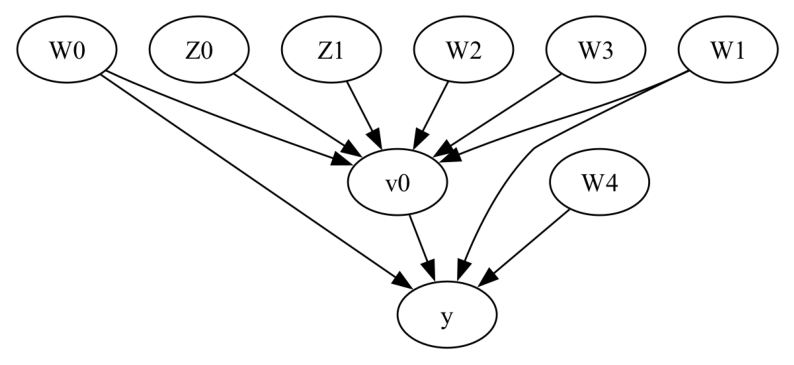

2025-08-19 11:30:45,158 INFO: Creating a causal model from the discovered/given causal graph
2025-08-19 11:30:45,159 INFO: Model to find the causal effect of treatment ['v0'] on outcome ['y']
2025-08-19 11:30:45,160 INFO: Identifying the effect estimand of the treatment on the outcome variable
2025-08-19 11:30:45,163 INFO: Causal effect can be identified.
2025-08-19 11:30:45,165 INFO: Instrumental variables for treatment and outcome:['Z1', 'W3', 'W2', 'Z0']
2025-08-19 11:30:45,167 INFO: Frontdoor variables for treatment and outcome:[]
2025-08-19 11:30:45,167 INFO: Note that you can also use other methods for the identification process. Below are method descriptions taken directly from DoWhy's documentation
2025-08-19 11:30:45,167 INFO: maximal-adjustment: returns the maximal set that satisfies the backdoor criterion. This is usually the fastest way to find a valid backdoor set, but the set may contain many superfluous variables.
2025-08-19 11:30:45,168 INFO: minimal-adjustment: returns

In [3]:
# Initialize the CausalModule with the provided parameters
causal_module = CausalModule(
    data=data,
    treatment_variable=treatment_variable,
    outcome_variable=outcome_variable,
)

# Find the causal graph
causal_module.find_causal_graph(algo=discovery_algorithm)
print(causal_module.graph.nodes())
# Refute the causal graph
# causal_module.refute_cgm(n_perm=10)
causal_module.see_graph()

# Create a causal graph model
causal_module.create_model()
# Identify the estimand
causal_module.identify_effect()
# Estimate the effect
causal_module.estimate_effect(ctrl_val=control_value, trtm_val=treatment_value)
# Refute the estimate
# causal_module.refute_estimate()

# Save results to CSV (default directory is 'outputs/results')
causal_module.store_results()

In [4]:
interventional_samples = causal_module.simulate_intervention(
    variable_to_intervene_dict={
        "v0": lambda x: 1,
        "Z0": lambda x: 0,
        "Z1": lambda x: 0.5,
        "W0": lambda x: -1,
        "W1": lambda x: 1,
        "W2": lambda x: 0.5,
        "W3": lambda x: -1,
        "W4": lambda x: -2,
        },
    num_samples_to_draw=5000
)

Fitting causal mechanism of node y: 100%|██████████| 9/9 [00:00<00:00, 10.13it/s] 


In [5]:
type(interventional_samples)

pandas.core.frame.DataFrame

In [6]:
interventional_samples.head()

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0,0.5,-1,1,0.5,-1,-2,1,1
1,0,0.5,-1,1,0.5,-1,-2,1,1
2,0,0.5,-1,1,0.5,-1,-2,1,1
3,0,0.5,-1,1,0.5,-1,-2,1,1
4,0,0.5,-1,1,0.5,-1,-2,1,1


In [7]:
causal_module.store_results()

2025-08-19 11:31:02,171 INFO: ==========================================
2025-08-19 11:31:02,173 INFO: Number of nodes: 9
2025-08-19 11:31:02,173 INFO: ==========================================
2025-08-19 11:31:02,175 INFO: Number of edges: 10
2025-08-19 11:31:02,176 INFO: ==========================================
2025-08-19 11:31:02,176 INFO: Edge: Z0 -> v0, Weight: 1
2025-08-19 11:31:02,177 INFO: Edge: Z1 -> v0, Weight: 1
2025-08-19 11:31:02,177 INFO: Edge: W0 -> v0, Weight: 1
2025-08-19 11:31:02,178 INFO: Edge: W0 -> y, Weight: 1
2025-08-19 11:31:02,178 INFO: Edge: W1 -> v0, Weight: 1
2025-08-19 11:31:02,178 INFO: Edge: W1 -> y, Weight: 1
2025-08-19 11:31:02,179 INFO: Edge: W2 -> v0, Weight: 1
2025-08-19 11:31:02,179 INFO: Edge: W3 -> v0, Weight: 1
2025-08-19 11:31:02,179 INFO: Edge: W4 -> y, Weight: 1
2025-08-19 11:31:02,180 INFO: Edge: v0 -> y, Weight: 1
2025-08-19 11:31:02,180 INFO: ==========================================
2025-08-19 11:31:02,181 INFO: Paths from v0 [treatmen

In [8]:
causal_module.results.keys()

dict_keys(['graph_properties', 'node_quality_score', 'graph_quality_score', 'graph_quality_summary', 'effect_estimate', 'interventional_samples'])

In [9]:
causal_module.results['interventional_samples']

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0,0.5,-1,1,0.5,-1,-2,1,1
1,0,0.5,-1,1,0.5,-1,-2,1,1
2,0,0.5,-1,1,0.5,-1,-2,1,1
3,0,0.5,-1,1,0.5,-1,-2,1,1
4,0,0.5,-1,1,0.5,-1,-2,1,1
...,...,...,...,...,...,...,...,...,...
4995,0,0.5,-1,1,0.5,-1,-2,1,1
4996,0,0.5,-1,1,0.5,-1,-2,1,1
4997,0,0.5,-1,1,0.5,-1,-2,1,1
4998,0,0.5,-1,1,0.5,-1,-2,1,1


In [10]:
causal_module.results['effect_estimate']

{'Effect Estimate': np.float64(0.44412908203108137),
 'Realized Estimand Expression': 'b: y~v0+W1+W0+v0*W4',
 'Treatment Value': 1,
 'Control Value': 0}

In [12]:
causal_module.see_graph_quality_score()

2025-08-19 11:35:36,147 INFO: Graph Quality Score: [[14  2]
 [ 0 20]]


In [14]:
causal_module.store_results()

2025-08-19 11:35:47,063 INFO: ==========================================
2025-08-19 11:35:47,063 INFO: Number of nodes: 9
2025-08-19 11:35:47,063 INFO: ==========================================
2025-08-19 11:35:47,064 INFO: Number of edges: 10
2025-08-19 11:35:47,064 INFO: ==========================================
2025-08-19 11:35:47,065 INFO: Edge: Z0 -> v0, Weight: 1
2025-08-19 11:35:47,065 INFO: Edge: Z1 -> v0, Weight: 1
2025-08-19 11:35:47,065 INFO: Edge: W0 -> v0, Weight: 1
2025-08-19 11:35:47,065 INFO: Edge: W0 -> y, Weight: 1
2025-08-19 11:35:47,066 INFO: Edge: W1 -> v0, Weight: 1
2025-08-19 11:35:47,066 INFO: Edge: W1 -> y, Weight: 1
2025-08-19 11:35:47,066 INFO: Edge: W2 -> v0, Weight: 1
2025-08-19 11:35:47,066 INFO: Edge: W3 -> v0, Weight: 1
2025-08-19 11:35:47,067 INFO: Edge: W4 -> y, Weight: 1
2025-08-19 11:35:47,067 INFO: Edge: v0 -> y, Weight: 1
2025-08-19 11:35:47,067 INFO: ==========================================
2025-08-19 11:35:47,068 INFO: Paths from v0 [treatmen

In [15]:
causal_module.results['graph_quality_score']

array([[14,  2],
       [ 0, 20]])

In [20]:
causal_module.batch_intervention_predict(intervention_df=data[:5], outcome_var=outcome_variable, num_samples_to_draw=10)

Fitting causal mechanism of node y: 100%|██████████| 9/9 [00:00<00:00, 10.92it/s] 


,prediction,confidence
0,1,1.0
1,1,1.0
2,0,1.0
3,1,1.0
4,1,1.0


In [21]:
data[:5]

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.0,0.563985,0.219681,0.330623,-0.931133,-0.171746,1.093863,0,1
1,1.0,0.458952,-0.302010,-0.847700,0.977641,-0.937565,1.116277,1,1
2,1.0,0.302052,-1.101188,-0.607449,-1.991440,0.164634,0.204109,0,0
3,0.0,0.714686,-1.111344,2.592494,0.997588,0.097839,2.282559,1,1
4,1.0,0.632911,1.378345,-0.212992,-0.523261,1.205107,0.952975,1,1
